In [ ]:
# collect isotropic set
# display isotropic set
# collect omas set
# display omas set
# calculate predicted static set
# display predicted static set
# display full spectrum shift from isotropic to omas to static

In [ ]:
isotropicAndOmasSpikes = []

In [ ]:
import matplotlib.pyplot as plt
import random

def generateChart(spikes, title):
    ppm = [spike[0] for spike in spikes]
    names = [spike[1] for spike in spikes]

    plt.plot(ppm, [0] * len(ppm), marker='o', linestyle='')
    for i, name in enumerate(names):
        plt.text(ppm[i], 0, name, ha='center', va='bottom')

    plt.xlabel('PPM Spikes')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks([])
    plt.tight_layout()
    plt.show()

In [ ]:
def getStaticSpectrum():
  numCAtoms = int(input("Enter the number of carbon atoms in this molecule: "))

  for i in range(numCAtoms):
      name = input(f"Enter the name or character for bond {i+1}: ")
      ppm = float(input(f"Enter the PPM value for bond {name}: "))
      isotropicAndOmasSpikes.append([ppm, name, 0])

  generateChart(isotropicAndOmasSpikes, "Carbon Bonds PPM Spikes for isotropic Spectrum (MAS = 54.7 degrees)")

Enter the number of carbon atoms in this molecule: 3
Enter the name or character for bond 1: a
Enter the PPM value for bond a: 45
Enter the name or character for bond 2: b
Enter the PPM value for bond b: 67
Enter the name or character for bond 3: c
Enter the PPM value for bond c: 98


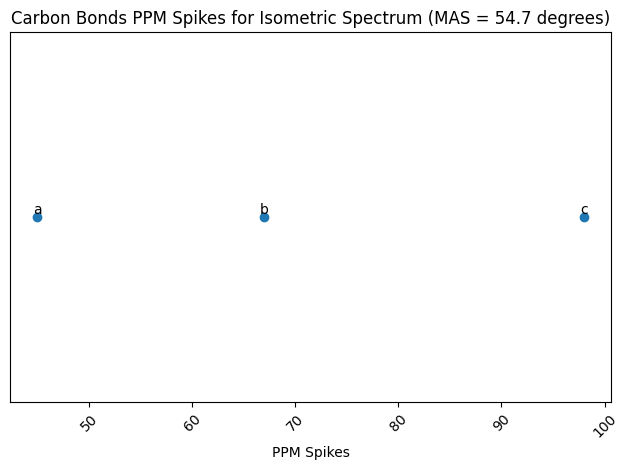

NameError: ignored

In [ ]:
getStaticSpectrum()

In [ ]:
def getOMASSpectrum():
  omas = int(input("Enter the OMAS angle: "))

  for spike in isotropicAndOmasSpikes:
      name = spike[1]
      ppm = float(input(f"Enter the PPM value for bond {name}: "))
      spike[2] = ppm;

  generateChart(isotropicAndOmasSpikes[1:2], 'Carbon Bonds PPM Spikes for OMAS Spectrum')

In [ ]:
getOMASSpectrum()

Enter the OMAS angle: 32
Enter the PPM value for bond 45.0: 60
Enter the PPM value for bond 67.0: 70
Enter the PPM value for bond 98.0: 110


NameError: ignored

im confused, restart

# collect isotropic set
# display isotropic set
# collect omas set
# display omas set
# calculate predicted static set
# display predicted static set
# display full spectrum shift from isotropic to omas to static

In [ ]:
def createSpectrumArray(numCBonds):
    spectrum = []
    #for i in range(numCBonds):
       # name = input(f"Enter the name for atom {i+1}: ")
       # isoPPM = float(input(f"Enter the isotropic ppm value for atom {name}: "))
       # omasPPM = float(input(f"Enter the OMAS ppm value for atom {name}: "))
       # spectrum.append([name, isoPPM, omasPPM, 0])

    spectrum = [
      ['a', 36.9, 12.4, 0],
      ['b', 35.5, 23.5, 0],
      ['c', 24.3, 67.5, 0]
    ]
    return spectrum

In [ ]:
import matplotlib.pyplot as plt


def generateCharts(spectrum):
    names = [atom[0] for atom in spectrum]
    iso_ppm_values = [atom[1] for atom in spectrum]
    omas_ppm_values = [atom[2] for atom in spectrum]
    shift_values = [omas - iso for iso, omas in zip(iso_ppm_values, omas_ppm_values)]
    predicted_values = [atom[3] for atom in spectrum]

    plt.figure(figsize=(10, 5))
    plt.subplot(131)
    plt.plot(names, iso_ppm_values, marker='o', linestyle='')
    plt.xlabel('Atoms')
    plt.ylabel('isotropic PPM')
    plt.title('isotropic Spectrum')
    plt.ylim(min(iso_ppm_values + omas_ppm_values) - 10, max(iso_ppm_values + omas_ppm_values) + 10)

    plt.subplot(132)
    plt.plot(names, omas_ppm_values, marker='o', linestyle='')
    plt.xlabel('Atoms')
    plt.ylabel('OMAS PPM')
    plt.title('OMAS Spectrum')
    plt.ylim(min(iso_ppm_values + omas_ppm_values) - 10, max(iso_ppm_values + omas_ppm_values) + 10)

    plt.subplot(133)
    plt.plot(names, iso_ppm_values, marker='o', linestyle='', label='Isotropic')
    plt.plot(names, omas_ppm_values, marker='o', linestyle='', label='OMAS')
    plt.plot(names, predicted_values, marker='o', linestyle='', label='Predicted')
    for name, iso_ppm, omas_ppm, predicted_value in zip(names, iso_ppm_values, omas_ppm_values, predicted_values):
        plt.text(name, iso_ppm, f'{iso_ppm:.2f}', ha='center', va='bottom')
        plt.text(name, omas_ppm, f'{omas_ppm:.2f}', ha='center', va='bottom')
        plt.text(name, predicted_value, f'{predicted_value:.2f}', ha='center', va='bottom')
    plt.xlabel('Atoms')
    plt.ylabel('PPM')
    plt.title('Spectrum Comparison')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import math

def calculatePredictedValues(omasAngle, spectrum):
    predicted_spectrum = []
    for atom in spectrum:
        name = atom[0]
        isoPPM = atom[1]
        omasPPM = atom[2]
        predictedValue = isoPPM + (omasPPM - isoPPM) / ((3*(math.pow(math.cos(math.radians(omasAngle)), 2)) - 1) / 2)
        atom[3] = predictedValue

In [ ]:
def main():
    numCBonds = int(input("Enter the number of carbon atoms at MAS (54.7 degrees): "))
    omasAngle = float(input("Enter the OMAS angle: "))
    spectrum = createSpectrumArray(numCBonds)

    calculatePredictedValues(omasAngle, spectrum)

    print("Spectrum Array: ")
    for atom in spectrum:
        print(atom)

    generateCharts(spectrum)

    # Additional code or computations using the spectrum array can be added here

Enter the number of carbon atoms at MAS (54.7 degrees): 3
Enter the OMAS angle: 22.4
Spectrum Array: 
['a', 54.3, 12.4, 0.7316342406848975]
['b', 76.4, 23.5, 8.768340127260885]
['c', 89.0, 67.5, 61.51265241467125]


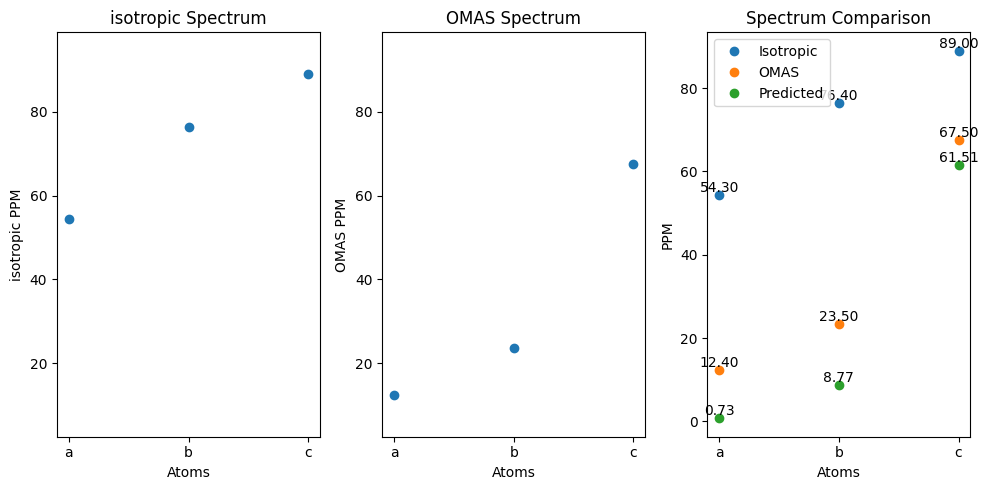

In [ ]:
# Call the main function to start the program
main()
